In [5]:
%matplotlib inline  
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from layers_edited import layers
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

BATCH_SIZE = 256
EPOCH_NUMBER = 100
SIZE_OF_DISTS = 2
INPUT_DIM = 28
OUTPUT_DIM = 10

x = tf.placeholder(tf.float32, shape=[None, INPUT_DIM, INPUT_DIM, 1])
#x = tf.reshape(x, [-1, 28, 28, 1])

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


conv_init = tf.contrib.layers.xavier_initializer_conv2d()
fc_init = tf.contrib.layers.xavier_initializer()

# ENCODER
conv1 = tf.contrib.layers.conv2d(x, num_outputs=32, kernel_size=5, stride=1, padding="SAME", weights_initializer=conv_init)
pool1 = tf.contrib.layers.max_pool2d (conv1, kernel_size=[2, 2], stride=[2, 2], padding='SAME')
conv2 = tf.contrib.layers.conv2d(pool1, num_outputs=64, kernel_size=5, stride=1, padding="SAME", weights_initializer=conv_init)
pool2 = tf.contrib.layers.max_pool2d (conv2, kernel_size=[2, 2], stride=[2, 2], padding='SAME')
fc1 = tf.contrib.layers.fully_connected(pool2, SIZE_OF_DISTS, weights_initializer=fc_init)
enc = tf.contrib.layers.fully_connected(fc1, SIZE_OF_DISTS, weights_initializer=fc_init)
print x.get_shape()
print conv1.get_shape()
print conv2.get_shape()
print fc1.get_shape()
print enc.get_shape()

# DECODER 
conv1_trans = tf.contrib.layers.conv2d_transpose(enc, num_outputs=64, kernel_size=5, stride=1, padding="SAME", weights_initializer=conv_init)
conv2_trans = tf.contrib.layers.conv2d_transpose(conv1_trans, num_outputs=32, kernel_size=5, stride=2, padding="SAME", weights_initializer=conv_init)
conv3_trans = tf.contrib.layers.conv2d_transpose(conv2_trans, num_outputs=1, kernel_size=3, stride=2, padding="SAME", weights_initializer=conv_init)
print conv3_trans.get_shape()

loss = tf.reduce_mean(tf.squared_difference(conv3_trans, x))
opt = tf.train.AdamOptimizer(1e-3).minimize(loss)

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for epochs in range(EPOCH_NUMBER):
        for batches in xrange(len(mnist.train.images)/BATCH_SIZE):
            batch = mnist.train.next_batch(BATCH_SIZE)
            
            shaped_batch = np.reshape(list(batch[0]), (BATCH_SIZE, 28, 28, 1)).astype(np.float32)
            sess.run([loss, opt], feed_dict={x: shaped_batch})[0]
        print sess.run([loss, opt], feed_dict={x: shaped_batch})[0]
        print epochs
        

    

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(?, 28, 28, 1)
(?, 28, 28, 32)
(?, 14, 14, 64)
(?, 7, 7, 2)
(?, 7, 7, 2)
(?, 28, 28, 1)
0.0138917
0
0.00943409
1
0.00848861
2
0.00780757
3
0.00676314
4
0.00656269
5
0.00591096
6
0.00574666
7
0.00632074
8
0.00559041
9
0.00558326
10
0.0052621
11
0.00548713
12
0.0048857
13
0.00518679
14
0.00506692
15
0.00463772
16
0.00467654
17
0.00466602
18
0.00491938
19
0.00494597
20
0.00463496
21
0.00462061
22
0.0044985
23
0.00413459
24
0.00443378
25
0.00424864
26
0.00439233
27
0.00424809
28
0.00390697
29
0.00437253
30


KeyboardInterrupt: 

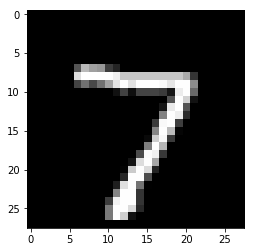

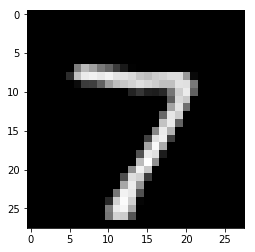

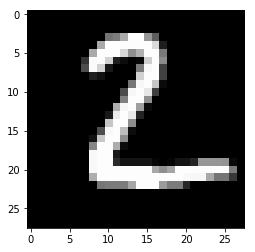

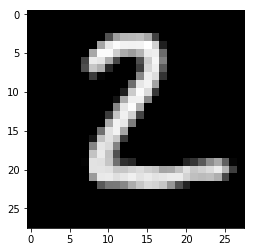

In [6]:
klm =  np.reshape(list(mnist.test.next_batch(2)[0]), (2, 28, 28, 1)).astype(np.float32)
images = sess.run(conv3_trans, feed_dict={x: klm})

plt.imshow(np.squeeze(klm[0]), cmap='gray', interpolation='none')
plt.show()
plt.imshow(np.squeeze(images[0]), cmap='gray', interpolation='none')
plt.show()
plt.imshow(np.squeeze(klm[1]), cmap='gray', interpolation='none')
plt.show()
plt.imshow(np.squeeze(images[1]), cmap='gray', interpolation='none')
plt.show()


NameError: name 'data' is not defined

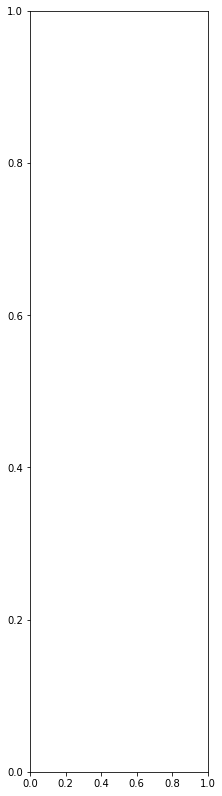

In [4]:
plt.figure(figsize=(7,14))
k=1
l = 5001
for i in [l+j for j in range(k)]:
    plt.subplot(k,2,1+(i-l)*2)
    plt.imshow(data['X_test'][i].reshape(DIM, DIM), cmap='gray', interpolation='none')
    if i == 0:
        plt.title('Original 60x60', fontsize=20)
    plt.axis('off')
    plt.subplot(k,2,2+(i-l)*2)
    plt.imshow(test_transform[i].reshape(DIM//3, DIM//3), cmap='gray', interpolation='none')
    if i == 0:
        plt.title('Transformed 20x20', fontsize=20)
    plt.axis('off')
plt.tight_layout()
print np.argmax(output_eval, axis=1)[l]